# Homework 2

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

# 1. Fridge Light Failure

Imagine that you work for a company that sells fridges, with a lifetime warranty for the fridge lights. Your boss is interested in understanding the distribution of the number of lights that will fail in a given month, based on data collected over the last several years. The data were collected by hand and manually entered, so data entry errors are possible. There are also some months with missing data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import zscore
from scipy.special import factorial
import scipy.optimize as so

In [ ]:
# Uncomment the line below if you are using Google colab
!gdown https://drive.google.com/uc?id=1wzY4XdkcwdNdVGL42PEN0ORtzWcdj2VF

Downloading...
From: https://drive.google.com/uc?id=1wzY4XdkcwdNdVGL42PEN0ORtzWcdj2VF
To: /content/Fridge Light Data.csv
100% 746/746 [00:00<00:00, 2.39MB/s]


1. Read the CSV file using Pandas and store it. All you've been given are a meaningless ID and the counts of the number of fridge lights that failed in each month.

In [ ]:
light_data = pd.read_csv('Fridge Light Data.csv')

2. Count the number of null values in the dataset, then remove them.

In [ ]:
light_data.isnull().sum()

,0
ID,0
x,4


In [ ]:
light_data = light_data.dropna(how='any',axis=0)
light_data.isnull().sum()

,0
ID,0
x,0


Number of null values: 4

3. Plot the distribution of the data. Add a title and axes labels to your plot.

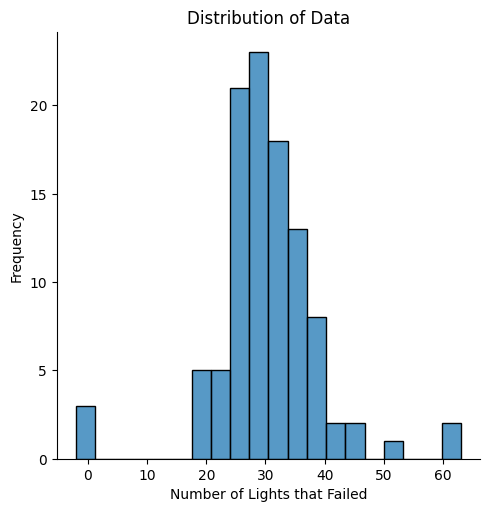

In [ ]:
sns.displot(light_data.x)
plt.title('Distribution of Data')
plt.xlabel('Number of Lights that Failed')
plt.ylabel('Frequency')
plt.show()

4. Count the number of observations that you know with **certainty** are data entry errors, then remove them. Explain why you know they are errors.

In [ ]:
print(np.sum(light_data.x < 0)) #negative values are certain data entry errors
light_data = light_data.drop(light_data[light_data.x < 0].index)

3


Number of certain data entry errors: 3. They are data errors as failures cannot be a negative number.

5. Compute the negative log-likelihood based on the assumption that the data comes from a Poisson($\lambda$) distribution. The negative log-likelihood for a Poisson($\lambda$) distribution is as follows:

$$
nll(\lambda) = n \lambda - \left(\sum_{i=1}^{n}x_i\right) log(\lambda) + \sum_{i=1}^{n}log(x_i!)
$$

In [ ]:
## Poisson Negative Log Likelihood
def poissonNegLogLikelihood(lambd, x):

    #define negative log_likelihood
    neg_log_lik = np.size(x)*lambd - np.sum(x) * np.log(lambd) + np.sum(np.log(factorial(x)))

    return neg_log_lik

#test your function on a dummy dataset with lambda = 25
dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]})
poissonNegLogLikelihood(25, dummy_data.x)

31.189286095130285

6. Consider integer values of $\lambda$ ranging from 10 to 50. Compute the negative log-likelihood for each of these values and plot it. Include a title and axes labels on your plot. Based on the plot, what value of $\lambda$ is most likely to have generated the data? You may give a small range.





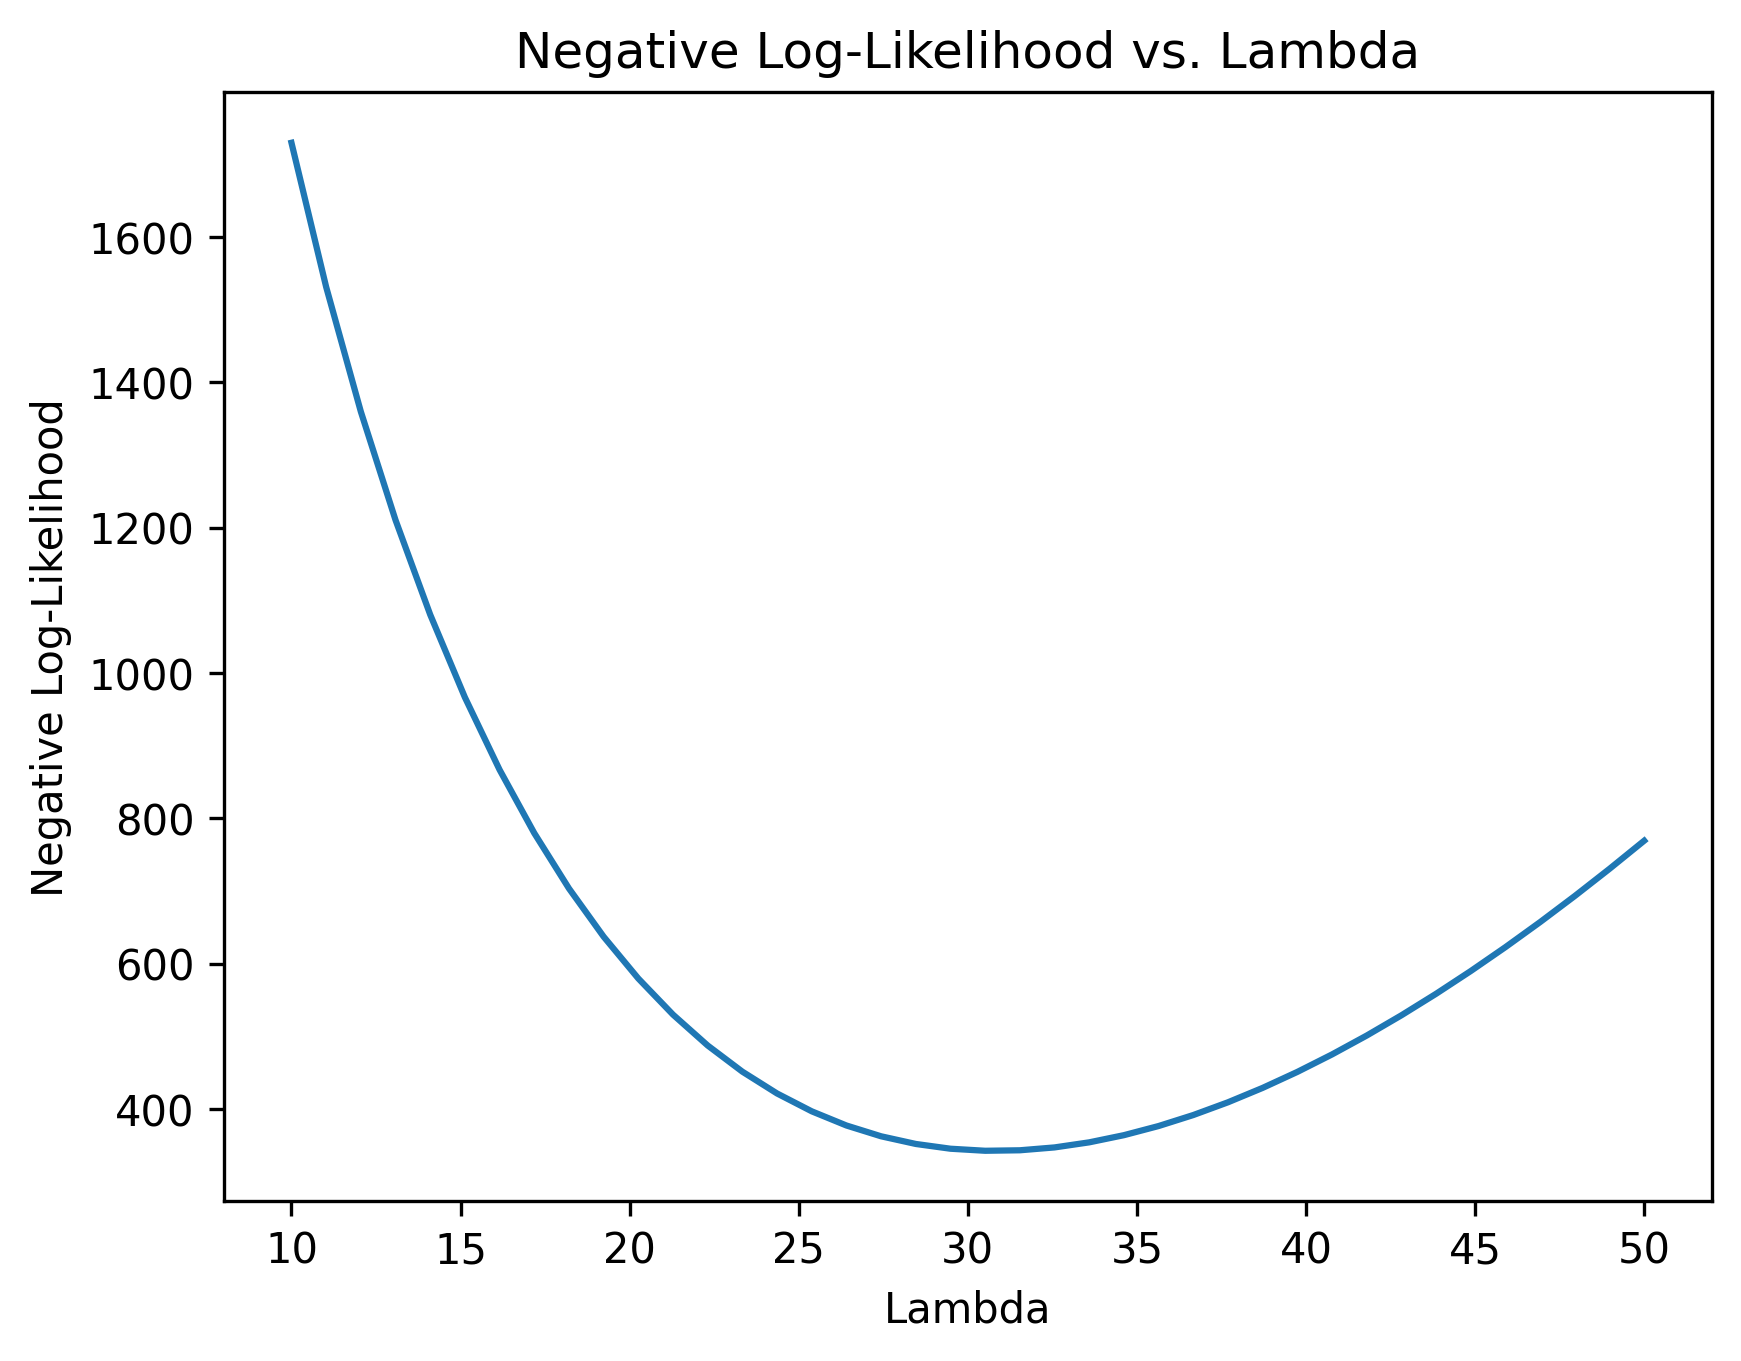

In [ ]:
# Create the axis where the plotting will happen
fig, ax = plt.subplots(dpi=300)

# Do the plotting
sns.lineplot(x=np.linspace(10, 50, 40, endpoint=True), y=poissonNegLogLikelihood(np.linspace(10, 50, 40, endpoint=True), light_data.x), ax=ax)

# Adjust the labels
ax.set_xlabel('Lambda')
ax.set_ylabel('Negative Log-Likelihood')
plt.title('Negative Log-Likelihood vs. Lambda')

# Display the plot
plt.show()

Value of $\lambda$ most likely to have generated the data: ~30

7. Compute the negative log-likelihood based on the assumption that the data comes from a Normal($\mu$, $\sigma$) distribution. The negative log-likelihood for a Normal($\mu$, $\sigma$) distribution is as follows:

$$
nll(\mu, \sigma) = \frac{n}{2}log(2π) + \frac{n}{2}log(\sigma^2) + \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2
$$

In [ ]:
## Normal Negative Log Likelihood
def normalNegLogLikelihood(params, x):

    #get the two parameters from the params argument
    mu = params[0]
    sigma = params[1]

    #define negative log likelihood
    neg_log_lik = np.size(x)/2*np.log(2*np.pi) + np.size(x)/2*np.log(sigma**2) + 1/(2*sigma**2)*np.sum((x-mu)**2)

    return neg_log_lik

#test your function on a dummy dataset with mu = 25, sigma = 3
dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]})
normalNegLogLikelihood([25, 3], dummy_data.x)

50.809976331586135

8. Determine the exact value of $\lambda$ that minimizes the negative log-likelihood for the Poisson distribution. Use so.minimize with method="Powell" and without a Jacobian.

In [ ]:
def maximumLikelihoodPoisson(x):
    #minimizing the negative log-likelihood, passing 25 as an initial guess for lambda
    RES = so.minimize(poissonNegLogLikelihood, 25, args=(x), method="Powell", tol = 1e-8)
    print(RES)
    return RES.x


# Test the function
maximumLikelihoodPoisson(light_data.x)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 342.68581943681875
       x: [ 3.082e+01]
     nit: 2
   direc: [[ 5.505e-07]]
    nfev: 84


array([30.81999982])

Value of $\lambda$ that minimizes the negative log-likelihood: 30.82

9. Determine the set of values of $\mu$ and $\sigma$ that minimizes the negative log-likelihood for the Normal distribution.

In [ ]:
def maximumLikelihoodNormal(x):
    #minimizing the negative log-likelihood, passing 25 and 5 as initial guesses for mu and sigma
    RES = so.minimize(normalNegLogLikelihood, x0 = np.array([25, 5]), args = (x), method="Powell", tol = 1e-8)
    print(RES)
    return RES.x


# Test the function
maximumLikelihoodNormal(light_data.x)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 341.35009219056553
       x: [ 3.082e+01  7.349e+00]
     nit: 2
   direc: [[ 0.000e+00  1.000e+00]
           [ 2.530e-09  1.021e-09]]
    nfev: 103


array([30.82      ,  7.34898631])

Values for $\mu$ and $\sigma$ that minimize the negative log-likelihood: 30.82, 7.35

10. There are three data entry errors that could potentially be valid entries. Which three are most likely to be data entry errors? Identify them by their value (i.e., not their index in the data).

In [ ]:
#the largest values are most likely to be data entry errors, so here we're just looking for the largest values by sorting
light_data.x.sort_values()

,x
80,19.0
20,19.0
69,20.0
46,20.0
42,20.0
...,...
66,44.0
29,44.0
60,52.0
27,61.0


Three most likely data entry errors: 52, 61, and 63

11. Remove the three observations that you think are most likely to be data entry errors. Determine the parameters that minimize the negative log-likelihoods for the Poisson($\lambda$) and Normal($\mu$, $\sigma$) distributions. Do your results change in a meaningful way?

In [ ]:
#remove the three values (no other values are greater than 50)
light_data = light_data.drop(light_data[light_data.x > 50].index)

maximumLikelihoodPoisson(light_data.x)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 302.2952016620511
       x: [ 2.996e+01]
     nit: 2
   direc: [[-6.821e-08]]
    nfev: 95


array([29.95876254])

In [ ]:
maximumLikelihoodNormal(light_data.x)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 302.9907435308491
       x: [ 2.996e+01  5.500e+00]
     nit: 2
   direc: [[ 0.000e+00  1.000e+00]
           [ 1.457e-08  1.468e-09]]
    nfev: 107


array([29.95876293,  5.49961112])

There isn't a huge change, but the estimate for sigma changes considerably.


12. Between the Poisson and Normal models, which one do you think is best to use to represent the data? Why? Provide your answer in no more than two lines.

I think the Poisson model is best. They have similar maximum likelihoods but the Poisson model only uses one parameter. In addition, we know that values can never be negative and must be discrete so the Poisson model logically makes more sense for this problem.